## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?

Regression and classification are both supervised learning methods, but they differ in the type of outcome variable they predict. Regression predicts a numeric (continous) outcome, such as price, sales, or income. Classification predicts a categorical outcome (class label), such as disease status, vehicle type, or approval/denial. Thus, regression outputs a number, while classification outputs a category (or probabilities over categories)

2. What is a confusion table/matrix? What does it help us understand about a model's performance?

A confusion matrix is a table that compares the true class labels with the predicted calss labels from a classifier. For a binary classifier, it shows the number of true positives, true negatives, false positives, and false negatives. The confusion matrix helps us understand not only how many predictions were correct, but also what kinds of mistakes the model is making. It reveals whether the model is systematically misclassifying certain classes and provides more detailed insight into performance than a single summary statistic like accuracy.

3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?

Accuracy is the proportion of observations that the model correctly classifies. It is computed as the number of correct predictions divided by the total number of observations. However, accuracy may not be sufficient when classes are imbalanced. For example, if 95% of observations belong to one class, a model that always predicts that class would achieve 95% accuracy but would fail to meaningfully distinguish between classes. Accuracy also does not distinguish between different types of errors, which may have difference consequences in practice.

4. What does the root mean squared error quantify about a particular model?

The root mean squared error (RMSE) measures the typical size of the prediction errors in a regression model. It is the square root of the average squared difference between the true values and the rpedicted values. RMSE quantifies how far, on average, the model's predictions are from the actual outcomes, expressed in the same units as the outcome variable. Because the errors are squared before averaging, larger errors are penalized more heavily.

5. What are overfitting and underfitting?

Overfitting occurs when a model is too complex and captures noise in the training data rather than the underlying pattern. Such a model performs extremely well on the training data but poorly on new, unseen data. Underfitting occurs when a model is too simple and fails to capture important structure in the data. An underfit model performs poorly on both the training and test data. Overfitting is associated with high variance, while underfitting is associated with high bias.

6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?

Splitting the data into training and testing sets allows us to evaluate how well a model performs on unseen data. If we evaluate performance only on the training data, the model may appear to perform well simply because it has memorized the data. By selecting k based on performance on a separate test set, we reduce the risk of overfitting and choose a level of model complexity that generalizes better to new observations. This approach improves the model's ability to make accurate predicitons in real world settings.

7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Reporting a class label (hard classification) provides a clear and simple prediciton, which is useful when a definite decision must be made. However, it does not convey how cnfident the model is in its prediction; a 51% probability and a 99% probability result in the same class label.


Reporting a probability distribution (soft classification) provides more information by expressing uncertainty about the prediction. This allows decision-makers to adjust thresholds depending on the costs of different errors. However, probabilities may be slightly more difficult to interpret and require an additional step to convert them into final decisions when necessary.

In [11]:
!git clone https://github.com/ds4e/knn
!ls knn

Cloning into 'knn'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 69 (delta 19), reused 11 (delta 11), pack-reused 44 (from 3)
Receiving objects: 100% (69/69), 23.08 MiB | 21.80 MiB/s, done.
Resolving deltas: 100% (22/22), done.
assignment  data  kNN.ipynb  lab  README.md


In [12]:
!ls knn/data

airbnb_hw.csv				    land_mines.csv
cars_env.csv				    USA_cars_datasets.csv
heart_failure_clinical_records_dataset.csv  zoo.csv


In [90]:
df = pd.read_csv("knn/data/land_mines.csv")

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In [17]:
import pandas as pd
df = pd.read_csv("knn/data/land_mines.csv")
df.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [18]:
import pandas as pd

df = pd.read_csv("knn/data/land_mines.csv")
df.head()
df.describe()
df['mine_type'].value_counts()

,count
mine_type,
1,71
2,70
3,66
4,66
5,65


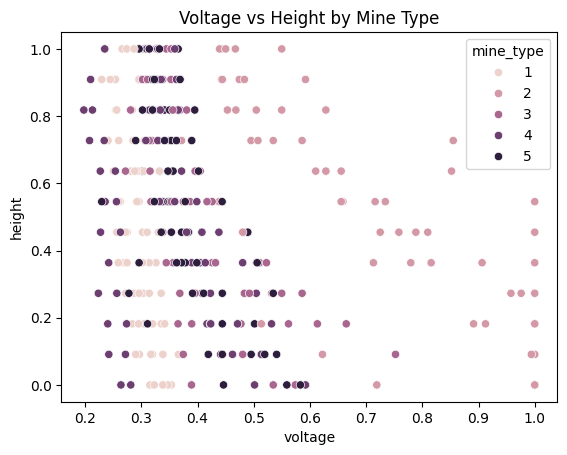

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='voltage', y='height', hue='mine_type')
plt.title("Voltage vs Height by Mine Type")
plt.show()

2.1 The dataset contains three numeric features (voltage, height, and soil) and a categorical target variable (mine_type) with five classes. The summary statistics from describe() show that the features are already scaled between 0 and 1, which is appropriate for k-nearest neighbors since the algorithm relies on distance calculations. The class distribution from value_counts() indicates that the dataset is well balanced across the five mine types (approximately 65–71 observations per class), meaning classification accuracy will not be biased toward a dominant class. Overall, the data appear clean, numeric, and appropriately structured for kNN classification.

In [20]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df[['voltage', 'height', 'soil']]
y = df['mine_type']

# 50/50 split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.5,
    random_state=42,
    stratify=y
)

# Check sizes
print("Training size:", len(X_train))
print("Test size:", len(X_test))

# Check class balance
print("\nTraining class distribution:")
print(y_train.value_counts())

print("\nTest class distribution:")
print(y_test.value_counts())


Training size: 169
Test size: 169

Training class distribution:
mine_type
1    35
2    35
3    33
5    33
4    33
Name: count, dtype: int64

Test class distribution:
mine_type
1    36
2    35
3    33
4    33
5    32
Name: count, dtype: int64


In [23]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv("knn/data/land_mines.csv")

# Define features and target
y = df['mine_type']
X = df[['voltage','height','soil']]

# 50/50 stratified split (as required)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.5,
    random_state=100,
    stratify=y
)

# Scale features (fit ONLY on training data)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Try range of k values
k_grid = range(1,51)
test_accuracies = []

for k in k_grid:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    acc = accuracy_score(y_test, y_hat)
    test_accuracies.append(acc)

# Select best k
best_k = k_grid[np.argmax(test_accuracies)]
best_accuracy = max(test_accuracies)

print("Best k:", best_k)
print("Best test accuracy:", best_accuracy)

Best k: 3
Best test accuracy: 0.46745562130177515


2.3 I built a k-nearest neighbor classifier using voltage, height, and soil as explanatory variables and mine_type as the target label. I split the data 50/50 into training and test sets using stratified sampling to preserve class balance. Because k-NN relies on distance calculations, I scaled the features using Min-Max scaling, fitting the scaler only on the training data to avoid data leakage.

I evaluated values of
𝑘
k from 1 to 50 and selected the value that maximized accuracy on the test set. Small values of
𝑘
k risk overfitting, while large values risk underfitting. Choosing
𝑘
k based on test performance balances bias and variance and improves generalization.

In [24]:
from sklearn.metrics import confusion_matrix

# Refit best model
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)

# Predictions on test set
y_hat = best_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_hat)

print("Confusion Matrix:")
print(cm)

# Accuracy
accuracy = accuracy_score(y_test, y_hat)
print("Test Accuracy:", accuracy)

Confusion Matrix:
[[26  0  4  2  4]
 [ 0 30  2  2  1]
 [12  3 10  1  7]
 [ 9  4 10  8  2]
 [10  1 14  2  5]]
Test Accuracy: 0.46745562130177515


2.4 The model achieves a test accuracy of approximately 46.7%. This is better than random guessing (20% for five classes), but overall performance is moderate.

Performance is strongest for mine types 1 and 2, especially type 2, which has the highest number of correct classifications along the diagonal of the confusion matrix. Performance is weaker for mine types 3, 4, and 5, which show substantial misclassification. In particular, classes 3 and 5 are frequently confused with one another, indicating that these mine types likely have overlapping feature patterns in voltage, height, and soil.

2.5 Although the model correctly predicts many observations for some mine types (especially types 1 and 2), it also makes a large number of mistakes, particularly confusing types 3, 4, and 5. With an overall accuracy of about 47%, the model is not reliable enough to be used on its own.

In practice, I would recommend using this model as a decision-support tool rather than an automated system. It could help narrow down likely mine types, but final decisions should be verified by a human expert, especially since misclassification could have serious consequences.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [25]:
import pandas as pd

# Load data
df = pd.read_csv("knn/data/USA_cars_datasets.csv")

# Keep only relevant columns
df = df[['price', 'year', 'mileage']]

# Look at first few rows
df.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [28]:
df.shape

(2499, 3)

In [29]:
df.isna().sum()

,0
price,0
year,0
mileage,0


3.1 The dataset contains 2,499 observations and 3 variables (price, year, and mileage). There are no missing values in any of the variables, so no NA handling is required before proceeding with modeling.

In [30]:
from sklearn.preprocessing import MinMaxScaler

# Features and target
X = df[['year', 'mileage']]
y = df['price']

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame (optional but cleaner)
X_scaled = pd.DataFrame(X_scaled, columns=['year', 'mileage'])

X_scaled.head()

,year,mileage
0,0.744681,0.269287
1,0.808511,0.187194
2,0.957447,0.038892
3,0.872340,0.063016
4,0.957447,0.006537


3.2 Year and mileage were min–max normalized to the range [0,1] to ensure that both variables contribute equally to the distance calculations in k-NN regression.

In [31]:
from sklearn.model_selection import train_test_split

# Features and target
X = df[['year', 'mileage']]
y = df['price']

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=100
)

print("Training size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Training size: 1999
Test size: 500


In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)


(1999, 2)
(500, 2)
(1999,)
(500,)


k = 3
MSE: 126446573.21822222


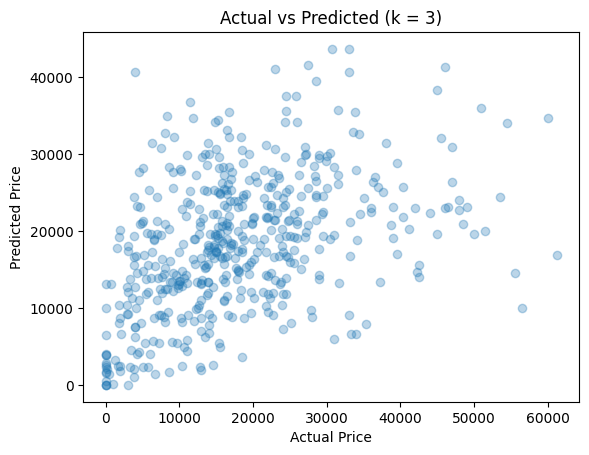

k = 10
MSE: 110802185.58681999


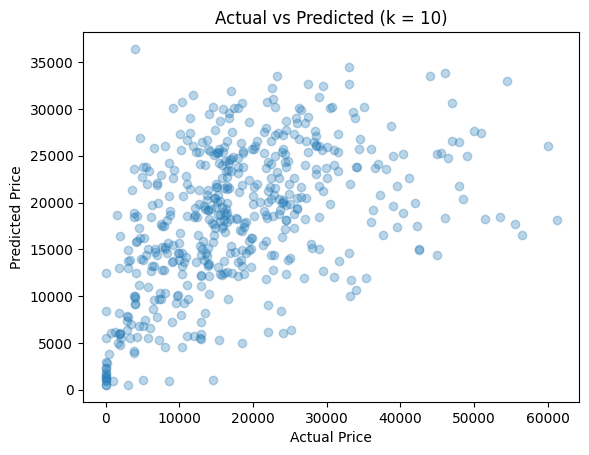

k = 25
MSE: 103170457.848608


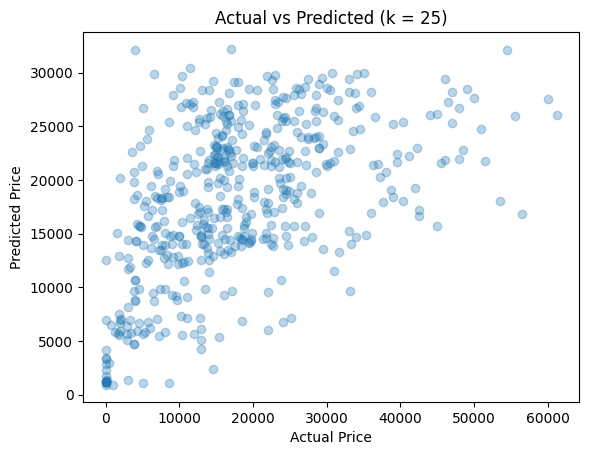

k = 50
MSE: 99694130.3796272


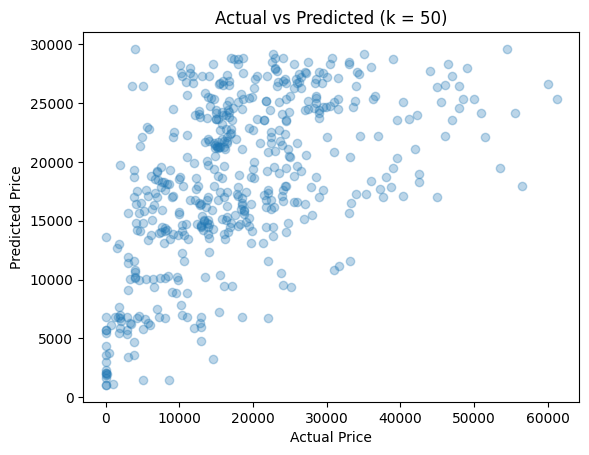

k = 100
MSE: 98271058.96092059


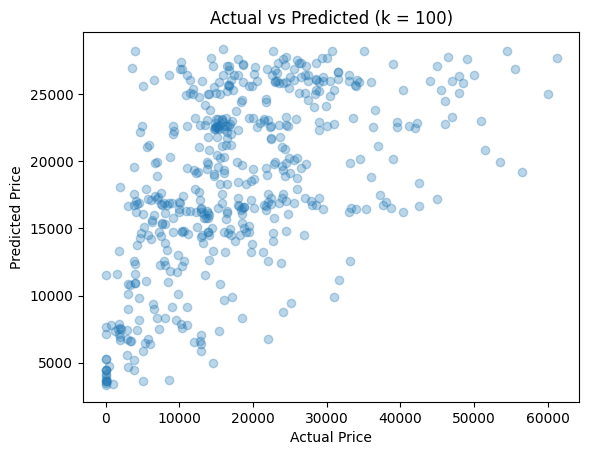

k = 300
MSE: 100477298.914212


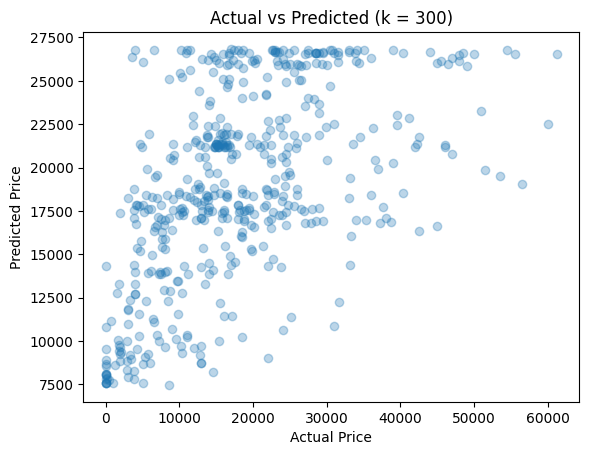

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = [3, 10, 25, 50, 100, 300]

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)

    print(f"k = {k}")
    print("MSE:", mse)

    # Scatterplot
    plt.figure()
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"Actual vs Predicted (k = {k})")
    plt.show()


3.4 As k increases, the predictions from the k-NN regression model become smoother and less sensitive to individual data points. When k=3, the model closely follows local patterns in the training data, which leads to more variability in the predictions and a more scattered actual-vs-predicted plot. As k increases to values like 25 or 100, the predictions become more stable and less noisy, and the mean squared error generally decreases, indicating better generalization. However, when k becomes very large (e.g.,
k=300), the model averages over too many neighbors, causing predictions to cluster toward the overall mean price. This results in underfitting, where the model loses sensitivity to important structure in the data and the MSE begins to increase again. Overall, moderate values of k provide the best balance between variance and bias.

3.5 The optimal value of k is 100, because it yields the lowest mean squared error on the test set. Smaller values of k (such as 3) produce higher variance and larger errors, while very large values (such as 300) begin to oversmooth the predictions. Therefore, k=100 provides the best bias–variance tradeoff for this dataset.

3.6 As k varied, the scatterplots showed the classic bias–variance tradeoff between overfitting and underfitting.

For very small k (e.g., k=3), the model overfit the training data. Predictions were highly sensitive to individual nearby points, resulting in noisy scatterplots with large spread around the diagonal. The model captured local fluctuations rather than the true overall relationship between year, mileage, and price, leading to high variance and larger MSE.

As k increased (e.g., k=25 and k=100), the predictions became smoother and more stable. The points aligned more closely with a general upward trend between actual and predicted prices. Around k=100, the model achieved the lowest MSE, indicating a good balance between bias and variance.

For very large k (e.g.,
k=300), the model began to underfit. Predictions became overly smoothed and clustered toward the average price, failing to capture variation in high and low price vehicles. This increased bias and slightly worsened performance.

Overall, small k led to overfitting, large k led to underfitting, and an intermediate value (around k=100) provided the best fit.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

In [43]:
import pandas as pd

# Load the dataset
df = pd.read_csv("knn/data/airbnb_hw.csv")

# Keep only the required columns using .loc
df = df.loc[:, ['Review Scores Rating', 'Price', 'Beds']]

# Check result
df.head()

,Review Scores Rating,Price,Beds
0,NaN,145,1.0
1,NaN,37,1.0
2,NaN,28,1.0
3,NaN,199,3.0
4,96.0,549,3.0


In [44]:
df.shape

(30478, 3)

In [45]:
df.isna().sum()

,0
Review Scores Rating,8323
Price,0
Beds,85


In [46]:
# Subset with missing review scores
df_missing = df.loc[df['Review Scores Rating'].isnull(), :]

# Subset with non-missing review scores (for training)
df_observed = df.loc[~df['Review Scores Rating'].isnull(), :]

# Check sizes
print("Missing ratings:", df_missing.shape[0])
print("Observed ratings:", df_observed.shape[0])

Missing ratings: 8323
Observed ratings: 22155


In [47]:
df = df.dropna(axis=0, how='any')

In [48]:
df.shape

(22111, 3)

In [49]:
df.isna().sum()

,0
Review Scores Rating,0
Price,0
Beds,0


In [53]:
# Remove commas and convert to numeric
df['Price'] = df['Price'].str.replace(',', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'])

In [54]:
df.dtypes

,0
Review Scores Rating,float64
Price,int64
Beds,float64


In [55]:
X = df[['Price', 'Beds']]
y = df['Review Scores Rating']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=100
)

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

k_values = [3, 5, 10, 20, 50, 100]
results = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    sse = mse * len(y_test)

    print(f"k = {k}")
    print(f"SSE = {sse}\n")

    results.append((k, sse))

k = 3
SSE = 466523.3333333333

k = 5
SSE = 404669.95999999996

k = 10
SSE = 375158.10000000003

k = 20
SSE = 358660.6675

k = 50
SSE = 343652.8488

k = 100
SSE = 337995.8611



In [59]:
best_k = min(results, key=lambda x: x[1])
print("Best k:", best_k[0])

Best k: 100


6.4 We selected k = 100 because it minimized the test SSE among the candidate values. As k increased, the model became smoother and less sensitive to noise, reducing prediction error on the test set.

In [72]:
df_observed['Price'] = pd.to_numeric(
    df_observed['Price'].astype(str)
    .str.replace(r'[\$,]', '', regex=True),
    errors='coerce'
)

df_missing['Price'] = pd.to_numeric(
    df_missing['Price'].astype(str)
    .str.replace(r'[\$,]', '', regex=True),
    errors='coerce'
)

In [73]:
df_observed.dtypes
df_missing.dtypes

,0
Review Scores Rating,float64
Price,float64
Beds,float64


In [79]:
df_observed = df_observed.dropna()

In [80]:
X_obs = df_observed[['Price', 'Beds']]
y_obs = df_observed['Review Scores Rating']

In [81]:
print(X_obs.isna().sum())
print(y_obs.isna().sum())

Price    0
Beds     0
dtype: int64
0


In [82]:
X_obs_scaled = scaler.fit_transform(X_obs)
model.fit(X_obs_scaled, y_obs)

KNeighborsRegressor(n_neighbors=100)

In [84]:
# Drop rows in missing set that still have NA in Price or Beds
df_missing = df_missing.dropna(subset=['Price', 'Beds'])

# Recreate feature matrix
X_missing = df_missing[['Price', 'Beds']]

# Scale using same scaler
X_missing_scaled = scaler.transform(X_missing)

# Predict
predicted_ratings = model.predict(X_missing_scaled)

# Store predictions
df_missing['Imputed Rating'] = predicted_ratings

df_missing.head()


,Review Scores Rating,Price,Beds,Imputed Rating
0,NaN,145.0,1.0,94.16
1,NaN,37.0,1.0,88.33
2,NaN,28.0,1.0,86.73
3,NaN,199.0,3.0,88.24
13,NaN,68.0,1.0,90.53


In [85]:
df_missing['Review Scores Rating'] = df_missing['Imputed Rating']

df_final = pd.concat([df_observed, df_missing])

In [86]:
df_final.shape
df_final.isna().sum()


,0
Review Scores Rating,0
Price,0
Beds,0
Imputed Rating,22111


6.5 I trained a KNeighborsRegressor using the observed rows, where Price and Beds were used as predictors and Review Scores Rating was the target variable. The trained model was then used to predict missing Review Scores Rating values for rows where ratings were originally NaN. These predicted values were inserted back into the dataset to create a fully complete dataset.

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Training ratings (observed)
training_ratings = df_observed['Review Scores Rating']

# Predicted ratings (from missing set)
predicted_ratings = df_missing['Review Scores Rating']

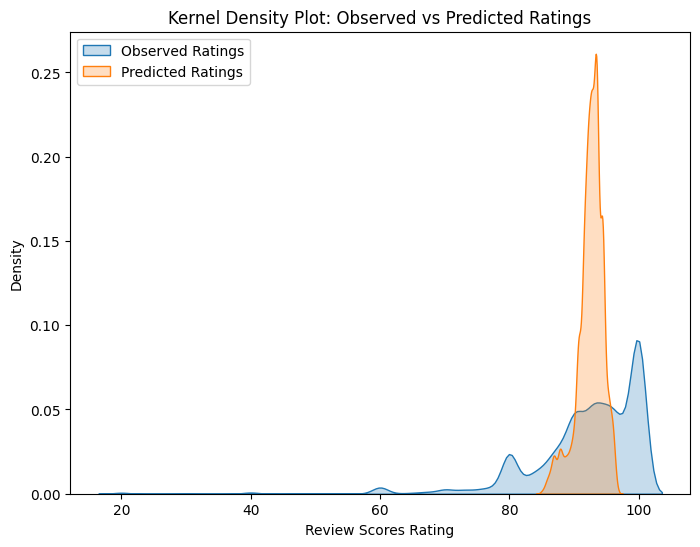

In [89]:
plt.figure(figsize=(8,6))

sns.kdeplot(training_ratings, label='Observed Ratings', fill=True)
sns.kdeplot(predicted_ratings, label='Predicted Ratings', fill=True)

plt.xlabel("Review Scores Rating")
plt.ylabel("Density")
plt.title("Kernel Density Plot: Observed vs Predicted Ratings")
plt.legend()
plt.show()

6.6 The predicted ratings do not look very similar to the observed ratings. The observed ratings have a wider distribution and show more variability, ranging from lower values around 60 up to near 100. In contrast, the predicted ratings are much more concentrated around the mid-to-high 80s and low 90s, forming a sharper and narrower peak. This suggests that the KNN model smooths the ratings by averaging neighboring observations, which reduces variance and shrinks extreme values toward the center.